# Orbit Plot
*Note that OrbitPlot has changed from being a function to a class in REBOUND version 3.22.* 

REBOUND comes with a simple way to plot instantaneous orbits of planetary systems. To show how this works, let's setup a test simulation with 4 planets.

In [1]:
import rebound
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, e=0.041, a=0.4, inc=0.2, f=0.43, Omega=0.82, omega=2.98)
sim.add(m=1e-3, e=0.24, a=1.0, pomega=2.14)
sim.add(m=1e-3, e=0.24, a=1.5, omega=1.14, l=2.1)
sim.add(a=-2.7, e=1.4, f=-1.5,omega=-0.7) # hyperbolic orbit

To plot these initial orbits in the $xy$-plane, we can simply create an `OrbitPlot` instance and give it the simulation as an argument during initialization.

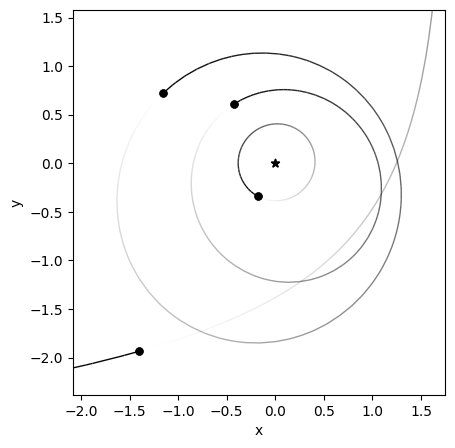

In [2]:
%matplotlib inline
op = rebound.OrbitPlot(sim)

You can access the matplotlib figure and axes using attributes `ob.fig` and `ob.ax`. This allows you for example to save the figure to a file:

In [3]:
op.fig.savefig("orbit.png")

There are various ways to customize the plot. Have a look at the arguments used in the following examples, which are pretty much self-explanatory (if in doubt, check the documentation!). 

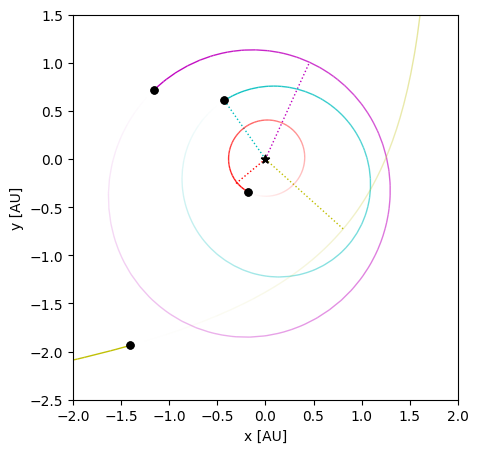

In [4]:
op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True, xlim=[-2,2], ylim=[-2.5,1.5])

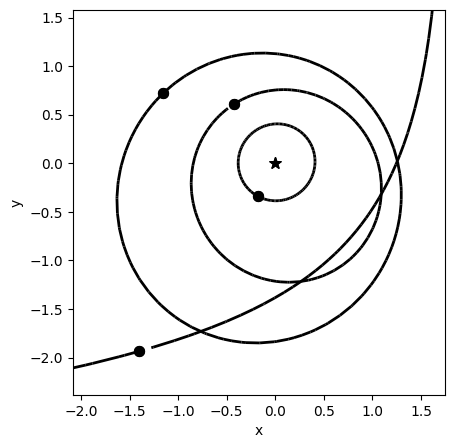

In [5]:
op = rebound.OrbitPlot(sim, orbit_style="solid", lw=2)

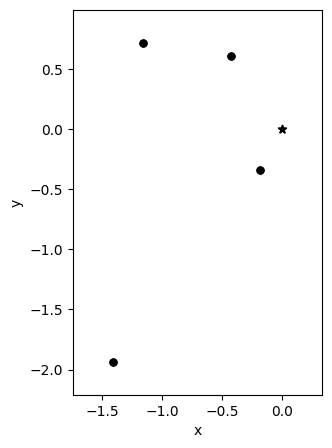

In [6]:
op = rebound.OrbitPlot(sim, orbit_style=None)

If you want to get a sense of the three dimensional architecture of a planetary system, you can use `OrbitPlotSet` which shows three different perspectives of the same system:

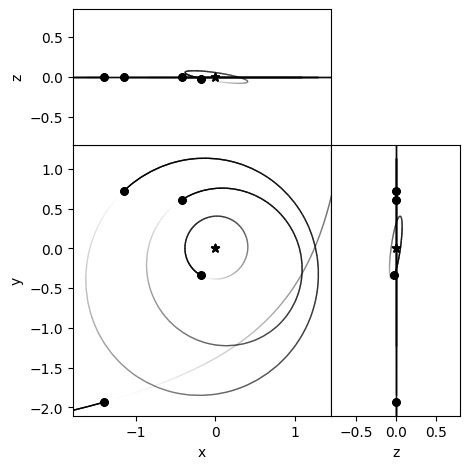

In [7]:
ops = rebound.OrbitPlotSet(sim)

# Primary particles

Note that all orbits that we have drawn so far used the center of mass of all interior particles as their primary particle. This coordinate system is known as Jacobi coordinates. It requires that the particles are sorted by ascending semi-major axis within the REBOUND simulation's particle array. You can specify the primary particle manually, for example to show heliocentric orbits or specific s- or p-type orbits in binaries. For example, have a look at this planetary system:

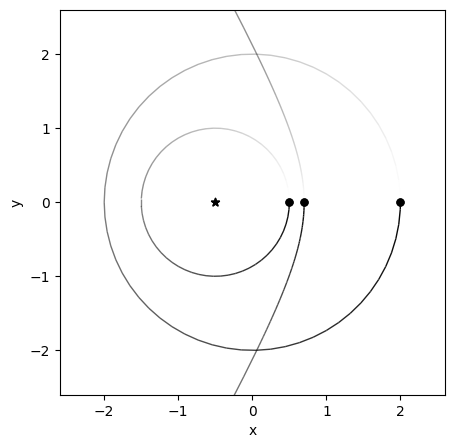

In [8]:
sim = rebound.Simulation()
sim.add(m=1.)       # Star A
sim.add(m=1., a=1.) # Star B
sim.add(a=2.)       # Circumbinary planet ABb
sim.add(a=0.2, primary=sim.particles[1]) # Planet Bb, orbiting star B 
sim.move_to_com()
fig = rebound.OrbitPlot(sim)

Circumbinary Planet ABb is plotted correctly in orbit around the center of mass of A and B, but Bb's Jacobi orbit is also around the center of mass of the interior particles, which, in this case renders as a hyperbolic orbit ( Note that although the plot looks incorrect, IAS15 would correctly integrate their motions).

One way to fix the visualization is to create two orbit plots using the same matplotlib figure and axes, but each showing different particles, around different primaries. Here's how this can be done:

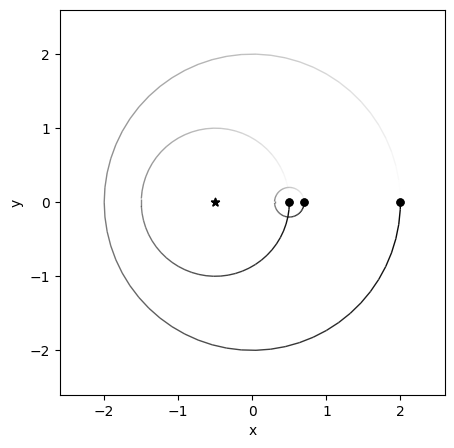

In [9]:
ob1 = rebound.OrbitPlot(sim, particles = [1,2])
ob2 = rebound.OrbitPlot(sim, particles = [3], primary=1, show_primary=False, fig=ob1.fig, ax = ob1.ax)

# Kepler-Orrery style plots

You can use a similar idea to show multiple planetary systems in the same figure. This time we're creating the matplotlib figure by hand and then adding one orbit plot for each system.

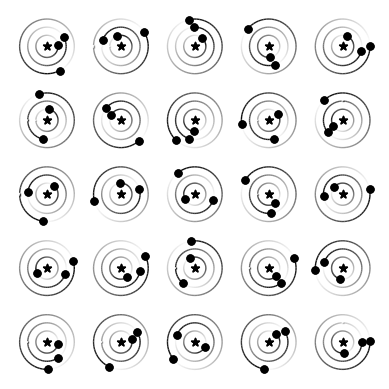

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect("equal") # this is needed if you don't want to get stretched orbits
ax.axis('off')  # no axis ticks
for x in range(5):
    for y in range(5):
        sim = rebound.Simulation()
        sim.add(m=1)
        for i in range(3):
            sim.add(a=3+2.2*i, f="uniform")
        sim.move_to_com()
        rebound.OrbitPlot(sim, fig=fig, ax=ax, origin = [-x*20., -y*20.])
ax.set_xlim([-10,90])
ax.set_ylim([-10,90]);

# Manually adjusting plot components

You can access the `PathCollection` and `LineCollection` structures that OrbitPlot uses internally to adjust their appearance. These are stored in the `primary`, `particles`, and `orbits` attributes. This gives you great flexibility when it comes to customizing your plot. For example:

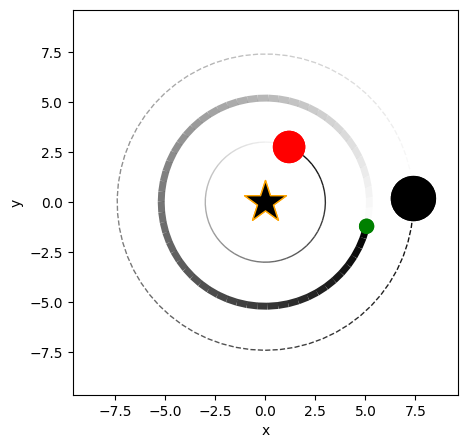

In [11]:
op = rebound.OrbitPlot(sim)
op.orbits[1].set_linewidth(5)
op.orbits[2].set_linestyle("--")
op.particles.set_color(["red", "green", "black"])
op.particles.set_sizes([500,100,1000])
op.primary.set_sizes([1000])
op.primary.set_edgecolor("orange")

Alternatively, you can combine multiple orbit plots in one figure to give you a similar result. For example:

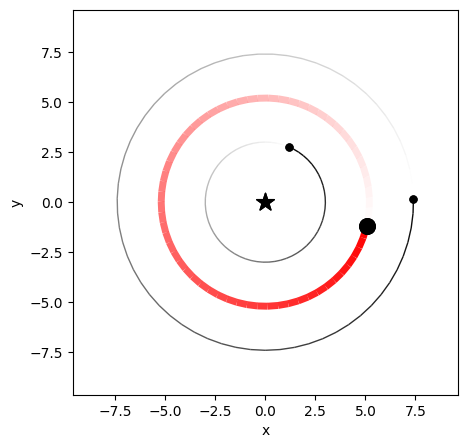

In [12]:
op1 = rebound.OrbitPlot(sim, particles=[1,3])
op2 = rebound.OrbitPlot(sim, particles=[2], ax=op1.ax, fig=op1.fig, lw=5, color="red")

# Updating plots

You can update the simulation data in an OrbitPlot after integrating the simulation. For example, integrating the last simulation and then updating the plot (including the highlighted orbit) can be done with:

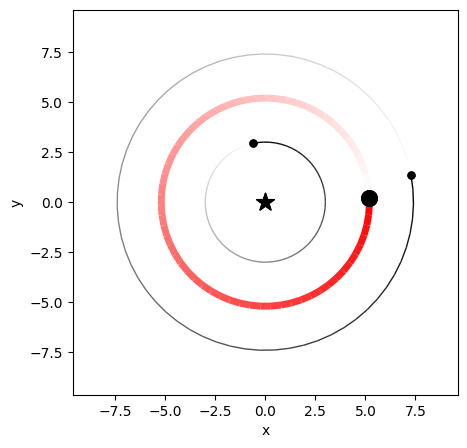

In [13]:
sim.integrate(sim.t+3.2)
op1.update()
op2.update() # red planet orbit
op1.fig

# Animations


Updating OrbitPlot is efficient. Only the underlying data is updated whereas the figure itself does not need to get recreated. This makes it possible to render animations. Let us first render a series of frames to files:

In [14]:
for i in range(3):
    sim.integrate(sim.t+0.31)
    op1.update()
    op2.update()
    op1.fig.savefig("out_%02d.png"%i)

You could now convert these images to a gif or a movie, for example by using ImageMagick's `convert` or `ffmpeg`.

# Interactive plots and animations in a jupyter notebook
You can update exisiting figures in a jupyter notebook if you use matplotlib's widget backend using `%matplotlib widget`. These figures are interactive, you can zoom in, move around, and resize them.

Note that you might need to run `%matplotlib widget` before importing rebound or matplotlib. If the following cells don't work, restart your kernel.

In [15]:
%matplotlib widget
import rebound

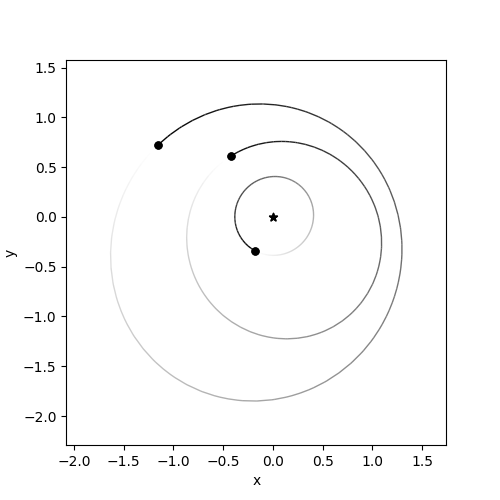

In [16]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, e=0.041, a=0.4, inc=0.2, f=0.43, Omega=0.82, omega=2.98)
sim.add(m=1e-3, e=0.24, a=1.0, pomega=2.14)
sim.add(m=1e-3, e=0.24, a=1.5, omega=1.14, l=2.1)
op = rebound.OrbitPlot(sim)

We can update the plot during an integration. 

In [17]:
fig = op.fig
for i in range(100):
    op.sim.integrate(sim.t+0.6)
    op.update()       # update data
    fig.canvas.draw() # redraw figure

Note that the simulation slowly drifted out of the frame. Ideally, we should move the simulation to the center of mass frame using `sim.move_to_com()`. Alternatively, we can also adjust the plot boundaries by passing the `updateLimits=True` argument to the update function:

In [18]:
for i in range(100):
    op.sim.integrate(sim.t+0.6)
    op.update(updateLimits=True)
    fig.canvas.draw()

You can make all the plots in the notebook interactive and update them dynamically. If a figure contains multiple OrbitPlots (such as in the orrery example), you need to call `update()` on each OrbitPlot.